In [1]:
%pip install --upgrade --user xarray matplotlib numpy scipy pandas pyarrow

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------------------------------- 165.9/165.9 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------- ---------------------------- 0.3/1.2 MB 10.6 MB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.4/8.0 MB 13.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.0 MB 11.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/8.0 MB 11.6 MB/s eta 0:00:01
   ---------- -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import square, sawtooth, chirp

# Frequency Analysis with Numpy and Matplotlib

### Overview

Frequency analysis is key to understanding the patterns in time series data, like the kind we get from EEG or LFP readings. It's about measuring the signal's strength and how often certain patterns show up. The initial step in this process is to visualize the data in the frequency domain. This way, we can see which frequencies stand out and get a better understanding of distinct activities within the signal.

#### Analysis Goals

In this notebook, we will focus on practical methods for extracting the frequency information from various types of signals. We will explore composite signals created by combining multiple waveforms, making it more challenging to identify their constituent frequencies. Finally, we will demonstrate how to transform time-domain signals into the frequency domain using Python.

#### Learning Goals

We'll use Python's [**Numpy**](https://numpy.org/) and [**Scipy**](https://docs.scipy.org/) packages to generate signals and also transform them into the frequency domain, using `scipy.fft`, and visualize the results with [**Matplotlib**]().

---

## Frequency Analysis

In this section, we will learn how to identify frequencies of oscillation of a composite signal

Most of the signals we observe or measure is composed of more than one frequency. Frequency analysis is an important tool in breaking down a composite signal into its constituent frequencies. We can transform our data in the time domain into the frequency domain in four steps:
1. Perform a Fourier Transform on the signal 
2. Calculate the frequencies corresponding to the FFT result 
3. Since the FFT result is symmetric, filter out the negative frequencies. 
4. Calculate the magnitude of the FFT result for positive frequencies and scale the result by a factor of 2.0/len(signal). 

<br>


| Code                                    | Description                                            |
| --------------------------------------- | ------------------------------------------------------ |
| `fft(some_signal)`                     | Step 1: Compute the Fast Fourier Transform of `some_signal`. This transforms the signal from the time domain to the frequency domain. |
| `fftfreq(len(some_signal), d=sampling_time)` | Step 2: Calculate the frequencies corresponding to the FFT result. `len(some_signal)` is the number of data points, and `sampling_time` is the time interval between samples. |
| `fft_freqs[fft_freqs > 0]`             | Step 3: Select only the positive frequencies from the `fft_freqs` array. This step filters out the negative frequencies. |
| `2.0/len(some_signal) * np.abs(fft_result[fft_freqs > 0])` | Step 4: Calculate the magnitude of the FFT result for positive frequencies. The factor `2.0/len(some_signal)` scales the result appropriately. |
| `plt.plot(x, y)` | Plot y values against x values. |
| `plt.subplot(nrows, ncols, nindex)` | `plt.subplot(211)` tells Python to create a grid of subplots with 2 rows and 1 column and to use the first subplot (top plot) for the current plotting commands. If you were to add another plotting command with plt.subplot(212), it would plot in the second subplot (bottom plot). |


**Example** Create a chirp signal with a constant frequency of 10 Hz, sampled 500 times between 0.01 s and 2.5 s. Let's compute the amplitude spectrum and also let's use subplots to plot both the time-domain as well as the frequency domain data.

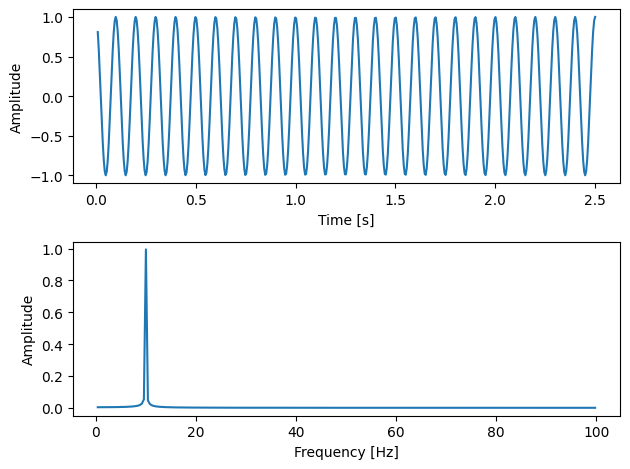

In [2]:
t = np.linspace(0.01, 2.5, 500)
w = chirp(t, f0=10, f1=10, t1=2.5)


## You just have to use the four lines for computing the amplitude spectrum
fft_result = fft(w) # transform to frequency domain
fft_freqs = fftfreq(len(w), d=(t[1] - t[0])) # get all frequencies that can be measured with the data we have
positive_freqs = fft_freqs[fft_freqs > 0] # take only positive frequencies
positive_fft_result = (2.0/len(w)) * np.abs(fft_result[fft_freqs > 0]) # take absolute of the amplitude and scale it by a factor of 2.0/len(signal)
## Ends here

plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()

We generated a signal of 10 Hz frequency and we see a peak at 10 Hz in the frequency domain!

Generate a chirp signal that begins with frequency of 10 Hz and increases to 20 Hz over a period of 2.5 seconds and compute amplitude spectrum. Plot the signal and the amplitude spectrum.

 Since this is a chirp signal, we would expect to see a distribution of energy across a range of frequencies from 10 Hz up to 20 Hz. The plot would likely show a peak that starts at 10 Hz and extends or spreads toward 20 Hz

Generate a chirp signal that begins with frequency of 10 Hz and increases to 20 Hz over a period of 2.5 seconds and compute amplitude spectrum. Before you run the code, predict how the figure would look like

Create two constant frequency signals w1 and w2 at 10 Hz and 25 Hz respectively, which are then summed together to form a composite signal w. What can you interpret from this?

Use `t = np.linspace(0.01, 2.5, 250)`

You see two peaks here: One at 10 Hz representing w1 and one at 25 Hz representing w2. Even though w is a composite signal, frequency space can still separate them out.